<a href="https://colab.research.google.com/github/Gooogr/Keras_MNIST_Deploying/blob/master/MNIST_fashion_classificator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras.utils import to_categorical 

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import numpy as np

import os

Using TensorFlow backend.


In [0]:
CLASS_NUM = 10
BATCH_SIZE = 128
EPOCHS_NUM = 15

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
dir_path = '/content/drive/My Drive/colab_notebooks/Keras_MNIST_Classification'

**Load data**

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [0]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


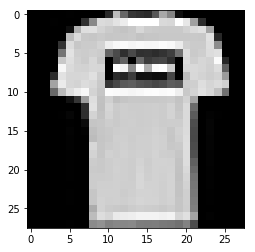

In [0]:
plt.imshow(train_images[1, :, :], 'gray')
plt.show()

**Prepare data**

In [0]:
# Reshape data for model input
X_train = np.reshape(train_images, (60000, 28, 28, 1)).astype('float32')
X_test = np.reshape(test_images, (10000, 28, 28, 1)).astype('float32')

#scale data
X_train /= 255
X_test /= 255

#labels one-hot encoding
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

**Set up model**

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(CLASS_NUM, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
model.fit(X_train, y_train, 
         batch_size = BATCH_SIZE,
         epochs = EPOCHS_NUM,
         verbose = 1,
         validation_data = (X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/15





60000/60000 [==============================] - 16s 271us/step - loss: 0.5371 - acc: 0.8116 - val_loss: 0.3361 - val_acc: 0.8787
Epoch 2/15
60000/60000 [==============================] - 9s 144us/step - loss: 0.3444 - acc: 0.8783 - val_loss: 0.2901 - val_acc: 0.8948
Epoch 3/15
60000/60000 [==============================] - 9s 143us/step - loss: 0.2971 - acc: 0.8939 - val_loss: 0.2574 - val_acc: 0.9049
Epoch 4/15
60000/60000 [==============================] - 9s 145us/step - loss: 0.2634 - acc: 0.9046 - val_loss: 0.2416 - val_acc: 0.9137
Epoch 5/15
60000/60000 [==============================] - 9s 150us/step - loss: 0.2381 - acc: 0.9137 - val_loss: 0.2224 - val_acc: 0.9203
Epoch 6/15
60000/60000 [==============================] - 9s 143us/step - loss: 0.2216 - acc: 0.9196 - val_loss: 0.2207 - val_acc: 0.9204
Epoch 7/15
60000/60

**Save results**

In [0]:
model_json = model.to_json()

with open(os.path.join(dir_path, 'mnist_fashion_model.json'), 'w') as json_file:
  json_file.write(model_json)
  
model.save(os.path.join(dir_path, 'mnist_fashion_model.h5'))

**Plots**

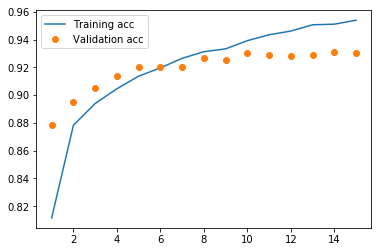

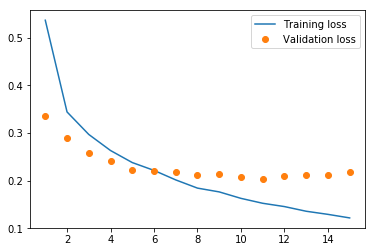

In [0]:
acc = model.history.history['acc']
val_acc = model.history.history['val_acc']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = np.arange(1, EPOCHS_NUM + 1)

plt.figure()
plt.plot(epochs, acc, label = 'Training acc')
plt.plot(epochs, val_acc, 'o', label = 'Validation acc')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, label = 'Training loss')
plt.plot(epochs, val_loss, 'o', label = 'Validation loss')
plt.legend()
plt.show()

**Prediction example**

In [0]:
fashion_dict = {0: 'T_shirt', 
                1: 'Trouser',
                2: 'Pullover',
                3: 'Dress',
                4: 'Coat',
                5: 'Sandal',
                6: 'Shirt',
                7: 'Sneaker',
                8: 'Bag',
                9: 'Ankle boot'}

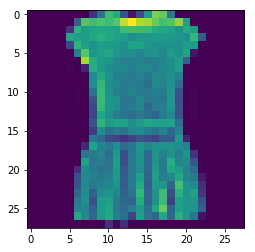

In [0]:
test_object = train_images[3, :, :]
plt.imshow(test_object)
plt.show()

In [0]:
test_object = test_object.reshape(1, 28, 28, 1)
predictions = model.predict(test_object)
predict = fashion_dict[np.argmax(predictions)]
print('Model prediction:', predict)

Model prediction: Dress
